In [15]:
# Load Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set up paths
PATH = os.getcwd()[:-13]
DATA_PATH = PATH + "Dataset\superstore.csv"

df = pd.read_csv(DATA_PATH)

**Check data loaded properly**

In [16]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Drop sales since we don't want to "peek" at profit**

In [17]:
df = df.drop("Sales",axis=1)

**Check for nulls and dtypes**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Quantity       9994 non-null   int64  
 18  Discount

<AxesSubplot:>

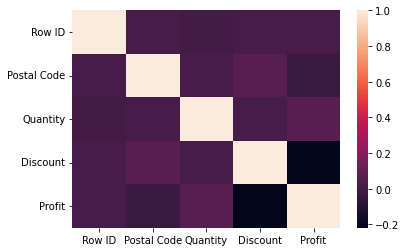

In [19]:
# Look for strong correlations among numerical data
sns.heatmap(df.corr())

# Brainstorm

Types of data we have:
- Geographic
- Time
- Descriptive
- Numerical

GEOGRAPHIC:
- These products are being shipped
- Distance from shipping site to location
  - Try to determine shipping location

TIME:
- Is there a time of year that makes more?
- How many years of data do we have?
- How does the profit change over time?
- Are are there locations that buy more during a time of year?
- Grab days of the week/ months/ years

DESCRIPTIVE:
- Do certain areas like certain catagories more?
- What product sells the most/least?
- Who is buying?
  - Who buys more Corporate/Consumer? (Quantity and profit)
  - What kind of shipping is preferred? By whom?

NUMERICAL: 
- Who gets most/least discounts? Why?
- When do discounts grow?
- Where gets the most/least discounts? Why?

THOUGHTS: 
There are many more questions to be asked and areas that could be explored, but
this should suffice for a glipmse into what is happening with our website.

ACTION:
Get the days of the week/ months/ year and then go top to bottom exploring each 
thought. (Subject to revision)



In [20]:
# Extract months/years/dayofweek and convert to pandas datetime object
def fix_time(data):
    # Convert to pandas datetime object
    data['Order Date'] = pd.to_datetime(data["Order Date"])
    data['Ship Date'] = pd.to_datetime(data["Ship Date"])

    # Get the day of the week
    data['Order_Day'] = data['Order Date'].dt.day_name()
    data['Ship_Day'] = data['Ship Date'].dt.day_name()

    # Get the month
    data['Order_Month'] = data['Order Date'].dt.month_name()
    data['Ship_Month'] = data['Ship Date'].dt.month_name()

    # Get the year
    data['Order_Year'] = data['Order Date'].dt.year.astype('object')
    data['Ship_Year'] = data['Ship Date'].dt.year.astype('object')

    return data


In [21]:
eda = fix_time(df)
eda

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Quantity,Discount,Profit,Order_Day,Ship_Day,Order_Month,Ship_Month,Order_Year,Ship_Year
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,2,0.00,41.9136,Thursday,Friday,August,November,2016,2016
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,0.00,219.5820,Thursday,Friday,August,November,2016,2016
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,2,0.00,6.8714,Tuesday,Thursday,December,June,2016,2016
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,5,0.45,-383.0310,Tuesday,Sunday,November,October,2015,2015
4,5,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,2,0.20,2.5164,Tuesday,Sunday,November,October,2015,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Ultra Door Pull Handle,3,0.20,4.1028,Tuesday,Thursday,January,January,2014,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,0.00,15.6332,Sunday,Friday,February,March,2017,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Aastra 57i VoIP phone,2,0.20,19.3932,Sunday,Friday,February,March,2017,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,0.00,13.3200,Sunday,Friday,February,March,2017,2017


**Use Tableau to visualize geographic data**

TIME:
- Is there a time of year that makes more?
- How many years of data do we have?
- How does the profit change over time?
- Are are there locations that buy more during a time of year?
- Grab days of the week/ months/ years

<AxesSubplot:xlabel='Ship_Year', ylabel='Profit'>

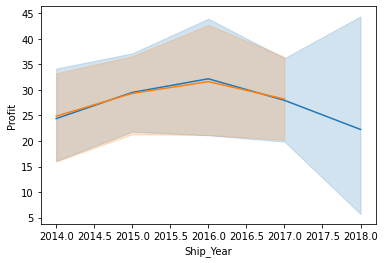

In [22]:
# 2015.5 was a good year, what happened?
# We have Ship but not Order
sns.lineplot(data=eda, x='Ship_Year', y='Profit')
sns.lineplot(data=eda, x='Order_Year', y='Profit')

In [23]:
eda.Ship_Year.sort_values().value_counts()

2017    3303
2016    2578
2015    2131
2014    1940
2018      42
Name: Ship_Year, dtype: int64

In [24]:
eda.Order_Year.sort_values().value_counts()

2017    3312
2016    2587
2015    2102
2014    1993
Name: Order_Year, dtype: int64

In [25]:
sns.barplot(data=eda, x='Order_DOW', y='Profit')

ValueError: Could not interpret input 'Order_DOW'

In [ ]:
sns.barplot(data=eda, x='Ship_DOW', y='Profit')


In [ ]:
sns.scatterplot(data=eda, x='State', y='Profit')

In [ ]:
eda.info()

In [26]:
drop_lst = (['Row ID',
            'Order Date', 'Ship Date', 
            'Order ID', 'Product Name',
            'Customer Name','Country',
            'Ship_Day','Ship_Year',
            'Ship_Month', 'Customer ID'])
eda.drop(drop_lst, axis=1, inplace=True)
eda.to_csv('sales EDA.csv')

In [ ]:
eda